In [8]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

In [9]:
# Loading Dataset
train_data = np.loadtxt('Data/TinyMNIST/trainData.csv', dtype=np.float32, delimiter=',')
train_labels = np.loadtxt('Data/TinyMNIST/trainLabels.csv', dtype=np.int32, delimiter=',')
test_data = np.loadtxt('Data/TinyMNIST/testData.csv', dtype=np.float32, delimiter=',')
test_labels = np.loadtxt('Data/TinyMNIST/testLabels.csv', dtype=np.int32, delimiter=',')
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Feature Selection
tr_samples_size, _ = train_data.shape
all_data = np.vstack((train_data,test_data))
sel = VarianceThreshold(threshold=0.90*(1-0.90))
all_data = sel.fit_transform(all_data)
train_data = all_data[:tr_samples_size]
test_data = all_data[tr_samples_size:]

tr_samples_size, feature_size = train_data.shape
te_samples_size, _ = test_data.shape
print('Train Data Samples:',tr_samples_size,
      ', Test Data Samples',te_samples_size,
      ', Feature Size(after feature-selection):', feature_size)

Train Data Samples: 5000 , Test Data Samples 2500 , Feature Size(after feature-selection): 62


In [10]:
X_train = train_data
X_test = test_data
y_train = train_labels
y_test = test_labels

In [89]:
def sfs():
    fixed_set = []
    step_accs = []
    remaining_features = list(range(feature_size))
    nbc = GaussianNB()

    for _ in range(feature_size):

        best_acc = -np.inf
        best_feature = None
        for f in remaining_features:
            
            fixed_set.append(f)
            sub_data = X_train[:, fixed_set].reshape(tr_samples_size, len(fixed_set))
            sub_target =  y_train.reshape(tr_samples_size, 1)
            nbc.fit(sub_data, sub_target)
            fixed_set.remove(f)

            score = nbc.score(sub_data, sub_target)
            if  score > best_acc:
                best_feature = f
                best_acc = score
        step_accs.append(best_acc)
        fixed_set.append(best_feature)
        remaining_features.remove(best_feature)

    return(step_accs)

step_accs = sfs()

[]
[33]
[33, 34]
[33, 34, 26]
[33, 34, 26, 45]
[33, 34, 26, 45, 17]
[33, 34, 26, 45, 17, 5]
[33, 34, 26, 45, 17, 5, 51]
[33, 34, 26, 45, 17, 5, 51, 14]
[33, 34, 26, 45, 17, 5, 51, 14, 39]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24, 30]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24, 30, 20]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24, 30, 20, 15]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24, 30, 20, 15, 48]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24, 30, 20, 15, 48, 16]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24, 30, 20, 15, 48, 16, 1]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24, 30, 20, 15, 48, 16, 1, 18]
[33, 34, 26, 45, 17, 5, 51, 14, 39, 59, 28, 3, 12, 24, 30, 20, 15, 48, 16, 1, 18

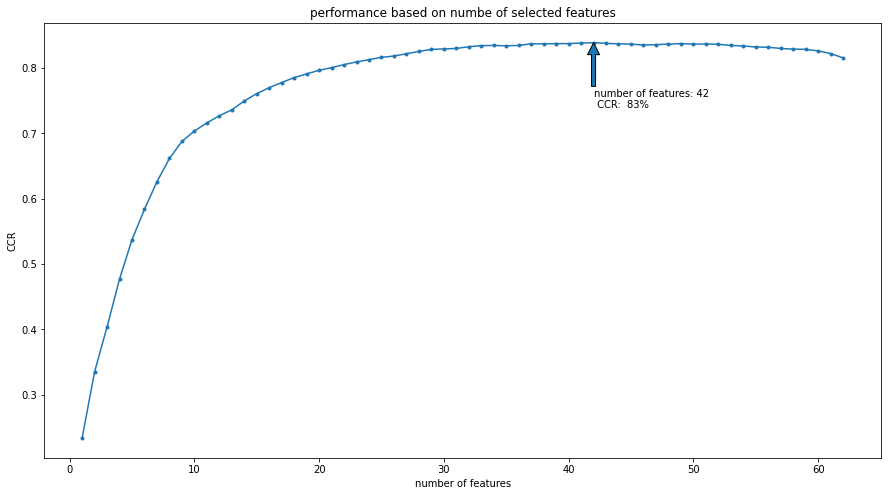

In [151]:
fig, ax = plt.subplots(figsize=(15,8))
x = np.arange(1, feature_size+1)
y = step_accs
y_max_idx = np.argmax(y)
x_max = x[y_max_idx]
y_max = np.max(y)
plt.plot(x, y, '.-');
plt.annotate('number of features: {} \n CCR:  {}%'.format(x_max, int(y_max*100)), (x_max, y_max), xytext=(x_max, y_max-0.1), arrowprops=dict())
plt.xlabel('number of features')
plt.ylabel('CCR')
plt.title('performance based on numbe of selected features');

# Problem 10

### Calculating Within-Class Scatter:

In [4]:
# calculating within-class scatter matrix:
s_w = np.zeros((X_train.shape[1], X_train.shape[1]))

for i in range(len(class_names)):
    class_data = X_train[np.where(y_train==i)]
    class_mean = np.mean(class_data, axis=0)
    class_scatter = np.dot((class_data - class_mean).T, class_data - class_mean)
    s_w = s_w + class_scatter

### Calculating Between-Class Scatter:

In [9]:
total_mean = np.mean(X_train, axis=0)

s_b = np.zeros((X_train.shape[1], X_train.shape[1]))

for i in range(len(class_names)):
    class_data = X_train[np.where(y_train==i)]
    n_i = class_data.shape[0]
    class_mean = np.mean(class_data, axis=0)
    mean_diff = n_i * np.dot((class_mean - total_mean).T, class_mean - total_mean)
    s_b = s_b + mean_diff

In [11]:
def inv(M):
    return np.linalg.inv(M)
     
def eig(M):
    return np.linalg.eig(M)

In [94]:
eig_vals, eig_vecs = eig(inv(s_w).dot(s_b))

In [95]:
eigval_eigvec = np.array(list(zip(np.abs(eig_vals), eig_vecs)))

In [96]:
decreasing_sorted = np.array(sorted(eigval_eigvec, key=lambda k : k[0], reverse=True))

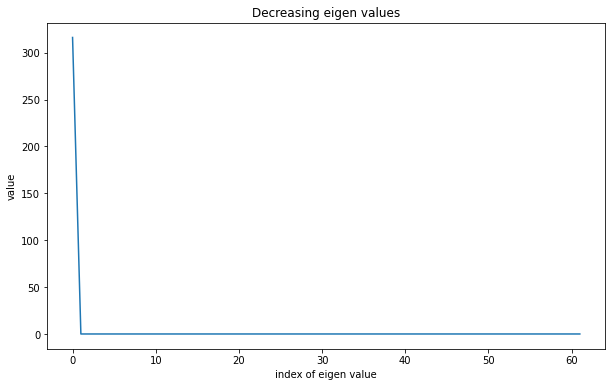

In [97]:
vals = decreasing_sorted[:,0]
fig,_ = plt.subplots(figsize=(10,6))
plt.plot(vals)
plt.title('Decreasing eigen values')
plt.xlabel('index of eigen value')
plt.ylabel('value');

In [102]:
projection_matrix = inv(s_w).dot(s_b)

In [103]:
new_num_of_features = 2

In [104]:
W = np.hstack((eigval_eigvec[0][1].reshape(-1,1), eigval_eigvec[1][1].reshape(-1,1)))

In [107]:
X_lda = X_train.dot(W)
X_lda.shape

(5000, 2)

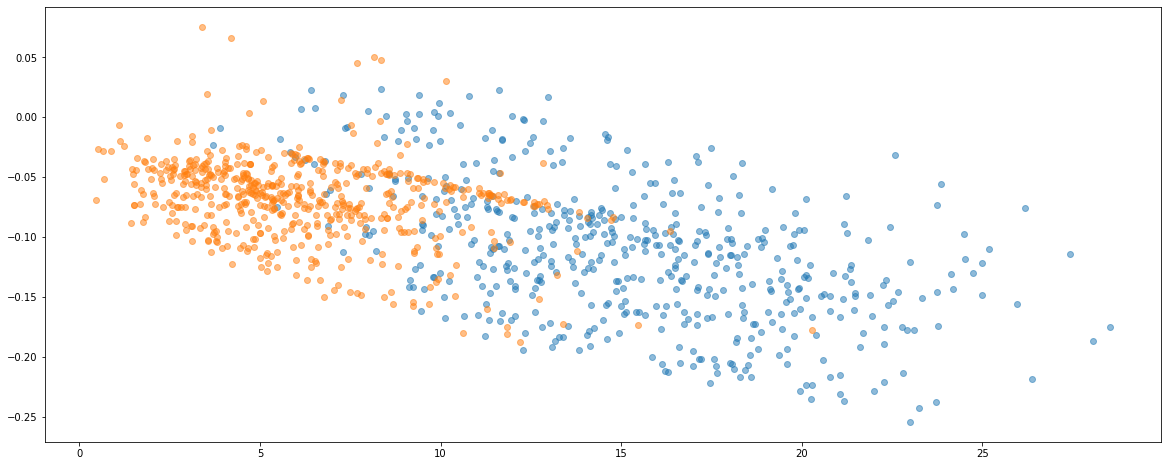

In [124]:
# fig, ax = plt.subplots()
# for i in range(len(class_names)):
#     class_data = X_train[np.where(y_train==i)]
#     ax.scatter(class_data)

ax = plt.subplots(figsize=(20,8))
for label in range(2):
    plt.scatter(x=X_lda[:,0].real[y_train == label],
            y=X_lda[:,1].real[y_train == label],
            # marker=marker,
            # color=color,
            alpha=0.5,
            # label=label_dict[label]
            )

In [127]:
nbc = GaussianNB()
nbc.fit(X_lda.real, y_train)

GaussianNB()

In [131]:
nbc.score(X_lda.real, y_train)

0.2706